In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime


In [64]:
df = pd.read_csv('nyc bus data.csv')
df = df.drop_duplicates()
# = df.dropna()
df.head()

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76,6/1/2017 0:03,24:06:14,NaN
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62,6/1/2017 0:03,23:58:02,NaN
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,6/1/2017 0:03,24:00:53,NaN
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,6/1/2017 0:04,24:03:00,NaN
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,6/1/2017 0:03,23:59:38,NaN


In [65]:
df.shape

(1048575, 18)

In [66]:
#subset the dataframe to include only the first 100,000 rows, or observations.
df = df.iloc[:100000, :]
df.shape

(100000, 18)

In [67]:
#checking for column types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            99904 non-null object
ArrivalProximityText         99904 non-null object
DistanceFromStop             99904 non-null object
ExpectedArrivalTime          88630 non-null object
ScheduledArrivalTime         98312 non-null object
Unname

In [68]:
df.isnull().sum()

RecordedAtTime                   0
DirectionRef                     0
PublishedLineName                0
OriginName                       0
OriginLat                        0
OriginLong                       0
DestinationName                  0
DestinationLat                   0
DestinationLong                  0
VehicleRef                       0
VehicleLocation.Latitude         0
VehicleLocation.Longitude        0
NextStopPointName               96
ArrivalProximityText            96
DistanceFromStop                96
ExpectedArrivalTime          11370
ScheduledArrivalTime          1688
Unnamed: 17                  99995
dtype: int64

In [69]:
#creating new features by converting strings to datetimes
df['expected_arrival'] = pd.to_datetime(df['ExpectedArrivalTime'], errors="coerce")
df['scheduled_arrival'] = pd.to_datetime(df['ScheduledArrivalTime'], errors="coerce")

In [70]:
#checking for null values before filling in missing data
df['expected_arrival'].isnull().value_counts()

False    88625
True     11375
Name: expected_arrival, dtype: int64

In [71]:
#checking for null values before filling in missing data
df['scheduled_arrival'].isnull().value_counts()

False    93530
True      6470
Name: scheduled_arrival, dtype: int64

In [72]:
#re-checking the shape of the data
df.shape

(100000, 20)

In [73]:
#filling in missing data 
df['expected_arrival'].bfill(axis=0, inplace=True)
df['scheduled_arrival'].bfill(axis=0, inplace=True)
df['DistanceFromStop'].ffill(axis=0, inplace=True)
df['ArrivalProximityText'].ffill(axis=0, inplace=True)
df['NextStopPointName'].ffill(axis=0, inplace=True)
df['ExpectedArrivalTime'].bfill(axis=0, inplace=True)
df['ScheduledArrivalTime'].bfill(axis=0, inplace=True)

In [74]:
#examining the number of null values in all columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            100000 non-null object
ArrivalProximityText         100000 non-null object
DistanceFromStop             100000 non-null object
ExpectedArrivalTime          100000 non-null object
ScheduledArrivalTime         100000 non-null object
U

In [75]:
#examining the head of the 'expected_arrival' column.
print(df['expected_arrival'].head())

0   2017-06-01 00:03:00
1   2017-06-01 00:03:00
2   2017-06-01 00:03:00
3   2017-06-01 00:04:00
4   2017-06-01 00:03:00
Name: expected_arrival, dtype: datetime64[ns]


In [76]:
#correcting the year value in the two new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(year=2017) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(year=2017) if not pd.isnull(t) else pd.NaT)

#correcting the day value in the new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(day=1) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(day=1) if not pd.isnull(t) else pd.NaT)

#correcting the month value in the new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(month=6) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(month=6) if not pd.isnull(t) else pd.NaT)
#print(df['expected_arrival'])

In [77]:
#create new feature to record the difference between each bus's scheduled arrival time and expected arrival time.
df['delay'] = df['scheduled_arrival'] - df['expected_arrival']

In [78]:
#converting 'delay' column from timedelta to datetime
df['delay'] = pd.to_datetime(df['delay'], errors="coerce")

In [79]:
#extracting the minutes from 'delay' column
df['delay_minute'] = df['delay'].dt.minute

In [80]:
#checking datatype of 'delay_minute' column
df['delay_minute'].dtype

dtype('int64')

In [81]:
#creating output variable
df['on_time'] = np.where((df['delay_minute'] > 5) | (df['delay_minute'] < -1), 0, 1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            100000 non-null object
ArrivalProximityText         100000 non-null object
DistanceFromStop             100000 non-null object
ExpectedArrivalTime          100000 non-null object
ScheduledArrivalTime         100000 non-null object
U

In [83]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,approaching,76,6/1/2017 0:03,24:06:14,NaN,2017-06-01 00:03:00,2017-06-01 23:58:02,1970-01-01 23:55:02,55,0
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,...,approaching,62,6/1/2017 0:03,23:58:02,NaN,2017-06-01 00:03:00,2017-06-01 23:58:02,1970-01-01 23:55:02,55,0
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,...,at stop,5,6/1/2017 0:03,24:00:53,NaN,2017-06-01 00:03:00,2017-06-01 23:59:38,1970-01-01 23:56:38,56,0
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,< 1 stop away,267,6/1/2017 0:04,24:03:00,NaN,2017-06-01 00:04:00,2017-06-01 23:59:38,1970-01-01 23:55:38,55,0
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,...,at stop,11,6/1/2017 0:03,23:59:38,NaN,2017-06-01 00:03:00,2017-06-01 23:59:38,1970-01-01 23:56:38,56,0


In [84]:
#using the 'on time' column and value counts to check how many buses were on time
df['on_time'].value_counts()

0    66793
1    33207
Name: on_time, dtype: int64

Out of a total of 100,000 recorded instances, 33,207 buses arrived on time and 66,793 buses were delayed.  This shows a significant class imbalance in our target variable that I will address before building a machine learning model from this data.

In [85]:
# Resampling our data to correct for imbalance in the class variable 'on_time'

# Class count, 2 represents benign, and 4 represents malignant
count_ontime_0, count_ontime_1 = df.on_time.value_counts()
print(count_ontime_0)
print(count_ontime_1)
# Divide by class
df_ontime_0 = df[df['on_time'] == 0]
df_ontime_1 = df[df['on_time'] == 1]

66793
33207


Random under-sampling:
1    33207
0    33207
Name: on_time, dtype: int64


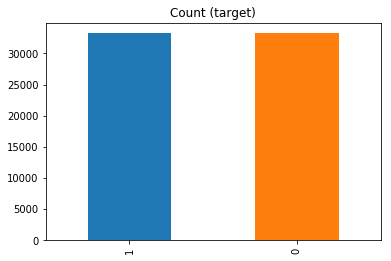

In [86]:
#extract the observations with class zero, equal to the number of obervations equal
df_ontime_0_under = df_ontime_0.sample(count_ontime_1)

#create a new dataframe with the same number of values for our two classes
new_df = pd.concat([df_ontime_0_under, df_ontime_1], axis=0)
new_df = new_df.reset_index()

print('Random under-sampling:')
print(new_df.on_time.value_counts())

new_df.on_time.value_counts().plot(kind='bar', title='Count (target)')

In [87]:
#taking a quick glimpse of new_df
new_df.head()

,index,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,15511,6/1/2017 6:03,1,M2,168 ST/AUDUBON AV,40.840645,-73.938545,EAST VILLAGE 8 ST via 5 AV,40.730282,-73.990532,...,approaching,133,6/1/2017 6:04,6:03:00,NaN,2017-06-01 06:04:00,2017-06-01 06:03:00,1969-12-31 23:59:00,59,0
1,96236,6/1/2017 11:44,0,Bx2,LINCOLN AV/E 137 ST,40.809616,-73.928276,KNGSBRDG HTS FT INDEP ST via CONCOURSE,40.878746,-73.898033,...,< 1 stop away,207,6/1/2017 11:45,11:34:58,NaN,2017-06-01 11:45:00,2017-06-01 11:34:58,1969-12-31 23:49:58,49,0
2,17415,6/1/2017 6:13,0,Bx8,TIERNEY PL/LONGSTREET AV,40.813728,-73.802574,WILLIAMSBRIGDE 225 ST,40.888496,-73.859879,...,approaching,60,6/1/2017 6:13,6:12:46,NaN,2017-06-01 06:13:00,2017-06-01 06:12:46,1969-12-31 23:59:46,59,0
3,57853,6/1/2017 8:54,1,Bx39,E 241 ST/CRANFORD AV,40.903339,-73.850052,CLASON PT,40.807545,-73.852341,...,< 1 stop away,210,6/1/2017 8:55,8:46:01,NaN,2017-06-01 08:55:00,2017-06-01 08:46:01,1969-12-31 23:51:01,51,0
4,40627,6/1/2017 7:53,0,S66,PARK AV/RICHMOND TE,40.639847,-74.130692,ST GEORGE FERRY via GRYMES HILL,40.643356,-74.072914,...,approaching,112,6/1/2017 7:53,7:40:31,NaN,2017-06-01 07:53:00,2017-06-01 07:40:31,1969-12-31 23:47:31,47,0


In [88]:
#exploring the 'OriginName' column
new_df.OriginName.describe()

count                          66414
unique                           457
top       ELTINGVILLE/TRANSIT CENTER
freq                            1330
Name: OriginName, dtype: object

It's important to know exactly how many different origin points we have in our data; by subsetting the "OriginName" column, we see that there are 457 unique origin points.  Next I will subset the data based on the two different values of the output variable, "on_time", to see if there is any relation between the Origin point of the bus and whether its on time or not.

Before performing any additional pre processing or feature creation, I will create a machine learing model with a decision tree to get an idea of the accuracy of the model at this point.

In [89]:
#creating two subsets of the dataframe; new_df_0 represents the subset with buses not on time, and new_df_1
# represents the subset with buses on time.
new_df_0 = new_df[new_df['on_time'] == 0]
new_df_1 = new_df[new_df['on_time'] == 1]


In [90]:
#exploring the PublishedLineName column
print(new_df_0.PublishedLineName.describe())
print(new_df_1.PublishedLineName.describe())


count     33207
unique      233
top         Q58
freq        576
Name: PublishedLineName, dtype: object
count     33207
unique      233
top          B6
freq        896
Name: PublishedLineName, dtype: object


In [91]:
#exploring the DestinationName column
print(new_df_0.DestinationName.describe())
print(new_df_1.DestinationName.describe())

count                        33207
unique                         508
top       WASHINGTON HTS GW BRIDGE
freq                           497
Name: DestinationName, dtype: object
count               33207
unique                510
top       ST GEORGE FERRY
freq                  486
Name: DestinationName, dtype: object


In [92]:
#exploring the 'OriginName' column for those buses that did not make it to their destinations on time.
new_df_0.OriginName.describe()

count             33207
unique              451
top       E 126 ST/2 AV
freq                637
Name: OriginName, dtype: object

In [93]:
#exploring the 'OriginName' column for those buses that made it on time.
new_df_1.OriginName.describe()

count                          33207
unique                           446
top       ELTINGVILLE/TRANSIT CENTER
freq                             742
Name: OriginName, dtype: object

Here I'm assuming the column "OriginName" to represent a bus stop, defined by the street intersection at which that bus stop is located at, from where each bus's route started, for each recorded observation in the data.

After subsetting the dataframe based on the binary values of the output variable, 'on_time', I noticed that the two subsets of the dataframe had similar number of unique "OriginNames; 450 out of 447 for the subset representing buses that were delayed and 446 out of 457 for the subset of data representing buses that were on time.  This suggests that both of the separate subsets had observations from almost all of the same bus stops, and that no one particular route was either always on time or always delayed.  Further analysis of the "OriginName" column below may help us see a pattern between the starting point (OriginName) of a bus's route and whether that bus was on time or not.

In [94]:
#examing the top ten value_counts of dataframe new_df_0.
new_df_1.OriginName.value_counts().head(20)

ELTINGVILLE/TRANSIT CENTER                 742
FLATBUSH AV/KINGS PLAZA                    566
HARWAY AV/BAY 37 ST                        534
MERRICK BL/ARCHER AV                       521
138 ST/37 AV                               404
W 179 ST/BROADWAY                          385
JFK AIRPORT/TERMINAL 5 AirTrain STATION    337
STILLWELL TERMINAL BUS LOOP                333
E 126 ST/2 AV                              313
BRICKTOWN SHOPPING/CENTER                  311
SHORE RD/4 AV                              304
LIVONIA AV/ASHFORD ST                      272
SPRINGFIELD BL / 119 AV                    271
LINCOLN RD/FLATBUSH AV                     269
ROCKAWAY AV/HEGEMAN AV                     253
PALMETTO ST/MYRTLE AV                      250
TEARDROP/LAYOVER                           226
WOODROW RD/VINELAND AV                     221
HILLSIDE AV/268 ST                         215
RIVERDALE AV/W 263 ST                      214
Name: OriginName, dtype: int64

In [95]:
#examining the top ten value_counts of dataframe new_df_0
new_df_0.OriginName.value_counts().head(20)

E 126 ST/2 AV                       637
ELTINGVILLE/TRANSIT CENTER          588
W 179 ST/BROADWAY                   468
MERRICK BL/ARCHER AV                447
FLATBUSH AV/KINGS PLAZA             363
W FARMS RD/WESTCHESTER AV           352
41 RD/MAIN ST                       315
BROADWAY/ISHAM ST                   314
4 AV/E 10 ST                        311
ASTOR PL/3 AV                       300
138 ST/37 AV                        290
HARWAY AV/BAY 37 ST                 270
EARHART LA/ERSKINE PL               263
3 AV/E FORDHAM RD                   261
PALMETTO ST/MYRTLE AV               256
ALABAMA AV / FULTON ST              253
TEARDROP/LAYOVER                    248
STILLWELL TERMINAL BUS LOOP         247
W 32 ST/7 AV                        246
RIVERSIDE DR/157-10 RIVERSIDE DR    225
Name: OriginName, dtype: int64

After examining the two lists of "OriginName" value counts above, I noticed that the two lists from the separate subsets of the data share alot of the same bus stop names.  Bus stops (OriginName) such as E 126 ST/2 AV, ELTINGVILLE/TRANSIT CENTER, MERRICK BL/ARCHER AV, FLATBUSH AV/KINGS PLAZA, HARWAY AV/BAY 37 ST, and TEARDROP/LAYOVER were involved with alot of delays but also alot of buses that made it to their destination on time.  Considering that this data is regarding New York City, this may suggest that their is another underlying factor causing delays, such as high traffic on the roads due to seasonality or caused by special events at or near some of the specific bus stops that I mentioned here. 

Aside from this, it should be noted that of the 20 Origin names in the second list of value counts (which represents those OriginNames that were related to those buses being delayed) 11 are unique; that is they are not in the top 20 list of value counts for origin names that were related to those buses that were on time.  Names such as W FARMS RD/WESTCHESTER AV, BROADWAY/ISHAM ST, ASTOR PL/3 AV, AND 41 RD/MAIN ST, just to name a few.


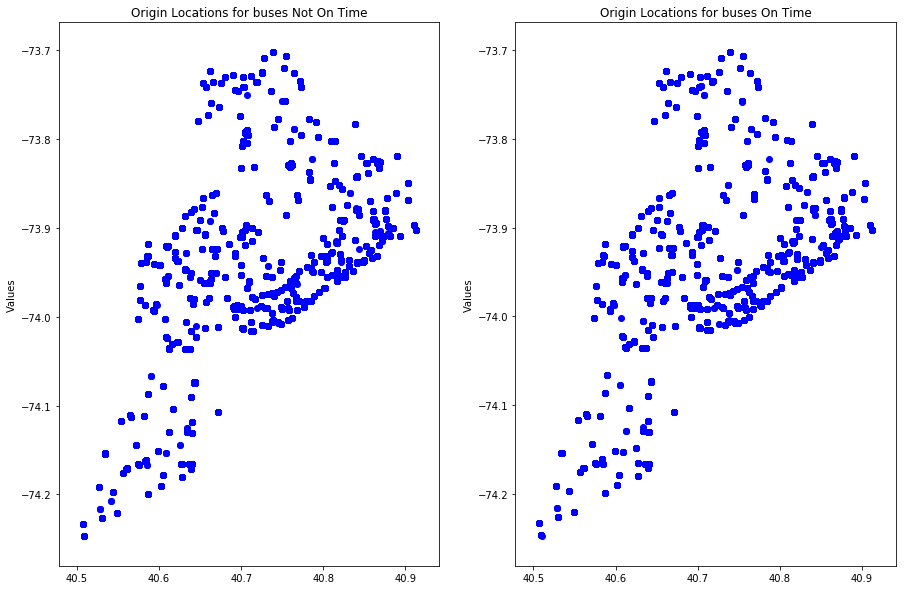

In [96]:
#making two scatter plots to show the origin locations of buses on time, and not on time, using origin latitude and origin
#longitude

#setting figure size
plt.figure(figsize=(15,10))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=new_df_0.OriginLat, y=new_df_0.OriginLong, color='blue')
plt.ylabel('Values')
plt.title('Origin Locations for buses Not On Time')

plt.subplot(1, 2, 2)
plt.scatter(x=new_df_1.OriginLat, y=new_df_1.OriginLong, color='blue')
plt.ylabel('Values')
plt.title('Origin Locations for buses On Time')
plt.show()

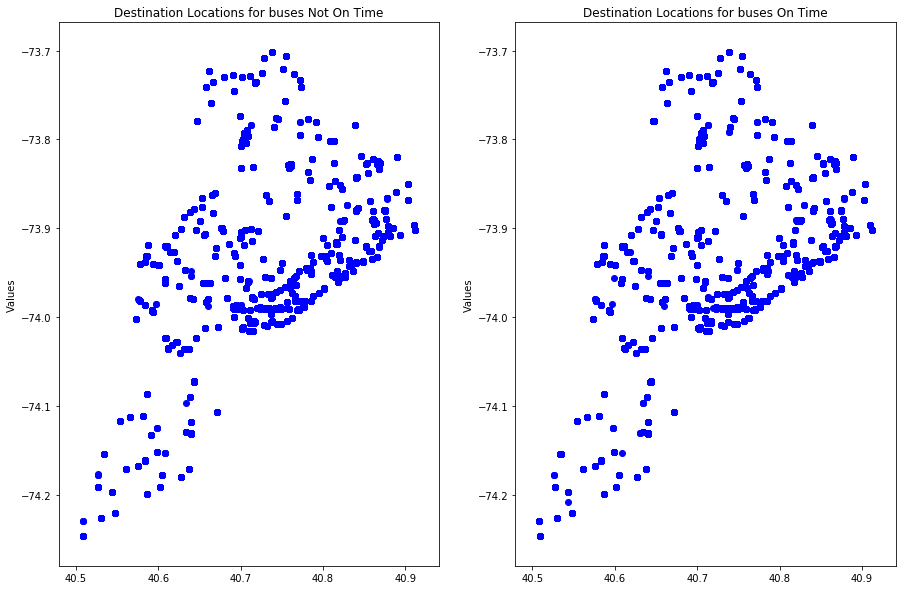

In [97]:
#making two scatter plots to show the origin locations of buses on time, and not on time, using origin latitude and origin
#longitude

#setting figure size
plt.figure(figsize=(15,10))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=new_df_0.DestinationLat, y=new_df_0.DestinationLong, color='blue')
plt.ylabel('Values')
plt.title('Destination Locations for buses Not On Time')

plt.subplot(1, 2, 2)
plt.scatter(x=new_df_1.DestinationLat, y=new_df_1.DestinationLong, color='blue')
plt.ylabel('Values')
plt.title('Destination Locations for buses On Time')
plt.show()

The two sets of scatterplot show the origin locations and destination locations using latitude and longitude for all buses, on time and those not on time, from the dataset.  As you can see, they are near identical for both scenarios, which further states that the bus route in of itself was not the sole factor for causing a bus to be on time to its destination or delayed.

In [125]:
new_df_0.DirectionRef.value_counts()

0    16842
1    16365
Name: DirectionRef, dtype: int64

In [126]:
new_df_1.DirectionRef.value_counts()

0    17471
1    15736
Name: DirectionRef, dtype: int64

In [100]:
new_df.head()

,index,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,15511,6/1/2017 6:03,1,M2,168 ST/AUDUBON AV,40.840645,-73.938545,EAST VILLAGE 8 ST via 5 AV,40.730282,-73.990532,...,approaching,133,6/1/2017 6:04,6:03:00,NaN,2017-06-01 06:04:00,2017-06-01 06:03:00,1969-12-31 23:59:00,59,0
1,96236,6/1/2017 11:44,0,Bx2,LINCOLN AV/E 137 ST,40.809616,-73.928276,KNGSBRDG HTS FT INDEP ST via CONCOURSE,40.878746,-73.898033,...,< 1 stop away,207,6/1/2017 11:45,11:34:58,NaN,2017-06-01 11:45:00,2017-06-01 11:34:58,1969-12-31 23:49:58,49,0
2,17415,6/1/2017 6:13,0,Bx8,TIERNEY PL/LONGSTREET AV,40.813728,-73.802574,WILLIAMSBRIGDE 225 ST,40.888496,-73.859879,...,approaching,60,6/1/2017 6:13,6:12:46,NaN,2017-06-01 06:13:00,2017-06-01 06:12:46,1969-12-31 23:59:46,59,0
3,57853,6/1/2017 8:54,1,Bx39,E 241 ST/CRANFORD AV,40.903339,-73.850052,CLASON PT,40.807545,-73.852341,...,< 1 stop away,210,6/1/2017 8:55,8:46:01,NaN,2017-06-01 08:55:00,2017-06-01 08:46:01,1969-12-31 23:51:01,51,0
4,40627,6/1/2017 7:53,0,S66,PARK AV/RICHMOND TE,40.639847,-74.130692,ST GEORGE FERRY via GRYMES HILL,40.643356,-74.072914,...,approaching,112,6/1/2017 7:53,7:40:31,NaN,2017-06-01 07:53:00,2017-06-01 07:40:31,1969-12-31 23:47:31,47,0


In [101]:
#examining the columns of new_df
new_df.columns

Index(['index', 'RecordedAtTime', 'DirectionRef', 'PublishedLineName',
       'OriginName', 'OriginLat', 'OriginLong', 'DestinationName',
       'DestinationLat', 'DestinationLong', 'VehicleRef',
       'VehicleLocation.Latitude', 'VehicleLocation.Longitude',
       'NextStopPointName', 'ArrivalProximityText', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Unnamed: 17',
       'expected_arrival', 'scheduled_arrival', 'delay', 'delay_minute',
       'on_time'],
      dtype='object')

In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66414 entries, 0 to 66413
Data columns (total 24 columns):
index                        66414 non-null int64
RecordedAtTime               66414 non-null object
DirectionRef                 66414 non-null int64
PublishedLineName            66414 non-null object
OriginName                   66414 non-null object
OriginLat                    66414 non-null float64
OriginLong                   66414 non-null float64
DestinationName              66414 non-null object
DestinationLat               66414 non-null float64
DestinationLong              66414 non-null float64
VehicleRef                   66414 non-null object
VehicleLocation.Latitude     66414 non-null float64
VehicleLocation.Longitude    66414 non-null float64
NextStopPointName            66414 non-null object
ArrivalProximityText         66414 non-null object
DistanceFromStop             66414 non-null object
ExpectedArrivalTime          66414 non-null object
ScheduledArrivalTime

In [103]:
new_df['DistanceFromStop'].isnull().sum()

0

In [104]:
#checking dataframe to see which rows have non numeric data. False means its not int or float
#new_df.applymap(lambda x: isinstance(x, (int, float)))

In [105]:
#converting 'DistanceFromStop' to numeric, and coercing errors which will make errors to nan, which i will correct below
new_df['DistanceFromStop'] = pd.to_numeric(new_df['DistanceFromStop'], errors='coerce')

In [106]:
new_df['DistanceFromStop'].isnull().sum()

5

In [107]:
new_df['DistanceFromStop'].dtype


dtype('float64')

In [108]:
new_df['DistanceFromStop'].shape

(66414,)

In [109]:
#this just gave me a long pandas series
#print(np.isnan(new_df['DistanceFromStop']))

In [110]:
#one way to check which rows have the nan or null values in "DistanceFromStop" column, by subsetting database for null values
print(new_df[pd.to_numeric(new_df['DistanceFromStop'], errors='coerce').isnull()])

       index  RecordedAtTime  DirectionRef PublishedLineName  \
15771  53190   6/1/2017 8:34             1               M10   
53965  56710   6/1/2017 8:44             0                M5   
56430  64872   6/1/2017 9:13             0                M5   
61000  80634  6/1/2017 10:24             0                M5   
65636  97070  6/1/2017 11:54             0                M5   

                      OriginName  OriginLat  OriginLong  \
15771  FRED DOUGLASS BL/W 158 ST  40.830956  -73.935989   
53965               6 AV/W 31 ST  40.748043  -73.988960   
56430               6 AV/W 31 ST  40.748043  -73.988960   
61000               6 AV/W 31 ST  40.748043  -73.988960   
65636               6 AV/W 31 ST  40.748043  -73.988960   

                            DestinationName  DestinationLat  DestinationLong  \
15771   COLUMBUS CIRCLE via CENTRAL PARK W.       40.766529       -73.981964   
53965  LIMITED WASHINGTON HEIGHTS GW BRIDGE       40.848263       -73.937454   
56430  LIMITED WASHI

In [112]:
#dropping the Nan values.  I could have also replaced the NaN values with with fillna(0)
new_df = new_df.drop(new_df.index[[15771,53965,56430,61000,65636]])

In [113]:
#rechecking the shape of the 'DistanceFromStop' column
new_df['DistanceFromStop'].shape

(66404,)

In [114]:
#dropping some columns and splitting the data and creating the initial train and test splits.
X = new_df.drop(['RecordedAtTime', 'ArrivalProximityText', 'Unnamed: 17', 'PublishedLineName', 'VehicleRef', 
                 'NextStopPointName', 'OriginName', 'DestinationName', 'ExpectedArrivalTime', 'ScheduledArrivalTime',
                 'expected_arrival', 'scheduled_arrival', 'delay', 'delay_minute'], 1)
Y = new_df['on_time']



In [115]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66404 entries, 0 to 66413
Data columns (total 10 columns):
index                        66404 non-null int64
DirectionRef                 66404 non-null int64
OriginLat                    66404 non-null float64
OriginLong                   66404 non-null float64
DestinationLat               66404 non-null float64
DestinationLong              66404 non-null float64
VehicleLocation.Latitude     66404 non-null float64
VehicleLocation.Longitude    66404 non-null float64
DistanceFromStop             66404 non-null float64
on_time                      66404 non-null int32
dtypes: float64(7), int32(1), int64(2)
memory usage: 5.3 MB


In [117]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=.3, random_state=20)
print(test_X.shape)
print(test_Y.shape)

(19922, 10)
(19922,)


In [118]:
# perform grid search to find the optimal parameters for our decision tree model
dtree = tree.DecisionTreeClassifier(random_state=2)
tree_param_grid = {'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10], 'max_features':[2,4,6,8], 
                   'criterion':['gini', 'entropy']}
dtree_grid = GridSearchCV(dtree, tree_param_grid, cv=5, verbose=3)
dtree_grid.fit(train_X, train_Y)
print('Best parameters for decision tree:', dtree_grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=2, score=0.6637625040335592, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=2, score=0.7263633430138754, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=2, score=0.6716144993008497, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=2, score=0.6683519793459552, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=2, score=0.672189349112426, total=   0.0s
[CV] criterion=gini, ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=5, score=0.6716144993008497, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=5, score=0.6683519793459552, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=5, score=0.672189349112426, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=8, score=0.6637625040335592, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=8, score=0.7263633430138754, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, max_features=2, min_samples_split=8, score=0.671614

[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=8, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=8, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=8, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=8, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=8, min_sa

[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=5, score=0.9219018932874354, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=5, score=0.9320064550833782, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, score=0.9220178552221147, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, score=0.8481230504463806, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, score=0.930622781542433, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, score=0.921901

[CV]  criterion=gini, max_depth=4, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=2, score=0.8786705388835108, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=2, score=0.8761966225664193, total=   0.0s
[CV] criterion=gini, max_d

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_s

[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, score=0.9281488652253415, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, score=0.936108422071636, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, score=0.9835413080895009, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, score=0.9080150618612157, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=2, score=0.9907497042056578, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=2, score=0

[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_split=5 
[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=5, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=8, min_samples_s

[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, score=0.5434010971281058, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, score=0.5450145208131656, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, score=0.5387263339070568, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, score=0.5448090371167295, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_features=6, min_sampl

[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=2, score=0.8235610543302851, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=5, score=0.8070345272668603, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=5, score=0.845434010971281, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=5, score=0.7893944283102076, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=5, score=0.8264845094664371, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, max_features=2, mi

[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=2, score=0.9234161557491664, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=2, score=0.9350328062815962, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=2, score=0.9253442340791739, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=2, score=0.8091447014523938, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=5, score=0.946434333656018, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=5 
[CV]  criterion=entropy, max_depth=6, max_features=4, mi

[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=8, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=8, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=8, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=8, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=8, min_samples_split=10 
[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=8, min_samples_split=10 
[CV]  criterion=entropy, max_depth=6, max_features=8, min_samples_split=10, score=1.0, total=   0.0s
[CV] criterion=entropy, ma

[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=10, score=0.9273881239242685, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=10 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=10, score=0.9033889187735341, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=2, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=2, score=1.0, total=   0.

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   25.4s finished


In [59]:
print('Best parameters for decision tree:', dtree_grid.best_params_)
print('Best score for decision tree: ', dtree_grid.best_score_)

Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_split': 2}
Best score for decision tree:  1.0


In [ ]:
# Create the first model by Initializing and training our tree before any additional preprocessing
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=6,
    max_depth=2,
    min_samples_split=2,
    random_state = 116
)

#set start time
start_time_tree = datetime.datetime.now()

#train our tree
decision_tree.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_dtree = decision_tree.predict(test_X)

#get accuracy score from our model
print('Accuracy score for decision tree Model: ' + str(metrics.accuracy_score(test_Y, y_pred_dtree)))

#calculate end time
end_time_tree = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_tree - start_time_tree))
print()

#get accuracy score of decision tree
tree_score = cross_val_score(decision_tree, X, Y, cv=5, scoring='accuracy')
print(tree_score)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score)))

In [ ]:
#an unconventional way to check for the null, nan, or NaT value in scheduled_arrival
#df['checkNaN'] = df['scheduled_arrival'].isnull()
#print(np.where(df['checkNaN'] == True)) 

#plt.figure(figsize=(10,10))
#sns.jointplot(x=new_df_0.OriginLat, y=new_df_0.OriginLong, size=10)
#plt.ylabel('Longitude', fontsize=12)
#plt.xlabel('Latitude', fontsize=12)
#plt.show()
#sns.despine

#plt.figure(figsize=(10,10))
#sns.jointplot(x=new_df_1.OriginLat, y=new_df_1.OriginLong, size=10)
#plt.ylabel('Longitude', fontsize=12)
#plt.xlabel('Latitude', fontsize=12)
#plt.show()
#sns.despine